In [18]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import linregress
from scipy.stats import pearsonr

sns.set() # Setting seaborn as default style even if use only matplotlib

%run test.py

Dataset : https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [19]:
listCodeCommuneGrandReims = [454, 58, 573, 474, 55, 105, 493, 562, 172, 115, 118]
codeDepartement = 51
listTypeTransaction = ['Vente', "Vente en l'état futur d'achèvement"]
listTypeLocal = ['Maison', 'Appartement']

In [20]:
fileList = ['rawdata/valeursfoncieres-2020-s1.txt', 'rawdata/valeursfoncieres-2019.txt', 'rawdata/valeursfoncieres-2018.txt', 'rawdata/valeursfoncieres-2017.txt', 'rawdata/valeursfoncieres-2016.txt', 'rawdata/valeursfoncieres-2015-s2.txt']

dataframeList = []
for filename in fileList:
    temp = createCityDataframe(pd.read_csv(filename, sep='|'), codeDepartement, listCodeCommuneGrandReims, listTypeTransaction, listTypeLocal)
    temp = removeOutliers(temp)
    dataframeList.append(temp)

df = pd.concat(dataframeList).sort_values(by='date', ascending=True)

C:\Users\75279\anaconda3\envs\Python 3_8\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\75279\anaconda3\envs\Python 3_8\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\75279\anaconda3\envs\Python 3_8\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\75279\anaconda3\envs\Python 3_8\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,

In [7]:
#df.to_csv('Data/valeursFoncieresGrandReims.csv', sep=',', index=False)
#df = pd.read_csv('data/valeursFoncieresGrandReims.csv')

In [21]:
df.shape

(5373, 9)

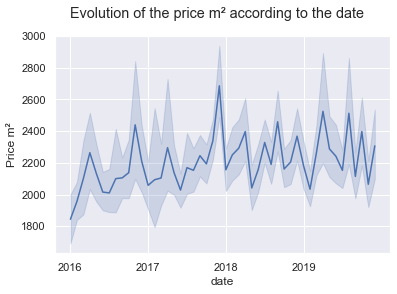

In [22]:
years = ['2016','2017','2018','2019']

fig, ax = plt.subplots(1, 1)
fig.suptitle('Evolution of the price m² according to the date')

g = sns.lineplot(x='date', y='prix_m²', data=df[df.date.str.contains('|'.join(years))])
g.set_xticks([0, 12, 24, 36])
g.set_ylabel('Price m²')
g.set_xticklabels(years)

plt.show()

In [23]:
df = createCityEWMA12PriceDataframe(df, ['2015','2016','2017','2018', '2019', '2020'])
df.head()

,date,ordinalDate,prix_m²_moyen_mois,EWMA-12-prix_m²_moyen_mois
6,2015-07,735780,2113.56,2113.560000
7,2015-08,735811,1956.32,2028.388333
8,2015-09,735842,1941.55,1994.495312
9,2015-10,735872,2035.77,2007.524118
10,2015-11,735903,1872.47,1970.830397


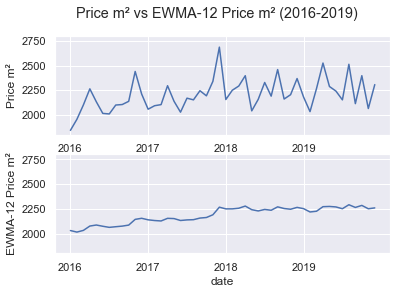

In [25]:
fig, ax = plt.subplots(2, 1)
fig.suptitle('Price m² vs EWMA-12 Price m² (2016-2019)')

years = ['2016','2017','2018','2019']

g = sns.lineplot(ax=ax[0], x='date', y='prix_m²_moyen_mois', data=df[df.date.str.contains('|'.join(years))])
g.set_xticks([0, 12, 24, 36])
g.set_ylim(1800, 2800)
g.set_ylabel('Price m²')
g.set_xticklabels(years)

h = sns.lineplot(ax=ax[1], x='date', y='EWMA-12-prix_m²_moyen_mois', data=df[df.date.str.contains('|'.join(years))])
h.set_xticks([0, 12, 24, 36])
h.set_ylim(1800, 2800)
h.set_ylabel('EWMA-12 Price m²')
h.set_xticklabels(years)

plt.show()

In [55]:
#cityAverageMonthlyPrice.to_csv('Data/grandReimsPrixMettreCarre.csv', sep=',', index=False)

In [26]:
correlationPrice, pvaluePrice = pearsonr(df['ordinalDate'], df['prix_m²_moyen_mois'])
correlationEWMA12Price, pvalueEWMA12Price = pearsonr(df['ordinalDate'], df['EWMA-12-prix_m²_moyen_mois'])
print('The Pearson correlation coefficient between price and date is', round(correlationPrice, 2), '\nThe Pearson correlation coefficient between EWMA-12 price and date is', round(correlationEWMA12Price, 2))

The Pearson correlation coefficient between price and date is 0.44 
The Pearson correlation coefficient between EWMA-12 price and date is 0.9


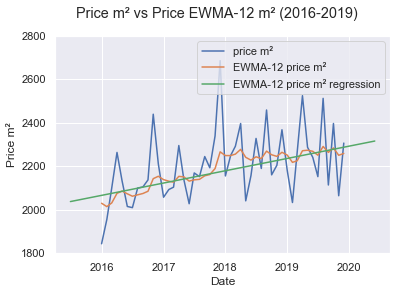

In [27]:
a, b, r, p_value, std_err = linregress(df['ordinalDate'], df['EWMA-12-prix_m²_moyen_mois'])
#print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

fig, ax = plt.subplots(1, 1)
fig.suptitle('Price m² vs Price EWMA-12 m² (2016-2019)')

years = ['2016','2017','2018','2019']
g = sns.lineplot(x='ordinalDate', y='prix_m²_moyen_mois', data=df[df.date.str.contains('|'.join(years))], label='price m²')
g.set_ylim(1800, 2800)

h = sns.lineplot(x='ordinalDate', y='EWMA-12-prix_m²_moyen_mois', data=df[df.date.str.contains('|'.join(years))], label='EWMA-12 price m²')
h.set_ylim(1800, 2800)

plt.plot(df['ordinalDate'], a * df['ordinalDate'] + b, label='EWMA-12 price m² regression')

ax.set_ylabel('Price m²')
ax.set_xlabel('Date')
ax.set_xticks([pd.to_datetime('2016-01').toordinal(), pd.to_datetime('2017-01').toordinal(), pd.to_datetime('2018-01').toordinal(), pd.to_datetime('2019-01').toordinal(), pd.to_datetime('2020-01').toordinal()])
ax.set_xticklabels(['2016','2017','2018','2019','2020'])

plt.legend()
plt.show()

In [28]:
for i in range(2015, 2031, 1):
    print('On the first January', i, 'the average price of the m² is estimated at', round(a * dt.datetime(i, 1, 1).toordinal() + b), '€')

On the first January 2015 the average price of the m² is estimated at 2010 €
On the first January 2016 the average price of the m² is estimated at 2066 €
On the first January 2017 the average price of the m² is estimated at 2123 €
On the first January 2018 the average price of the m² is estimated at 2180 €
On the first January 2019 the average price of the m² is estimated at 2236 €
On the first January 2020 the average price of the m² is estimated at 2293 €
On the first January 2021 the average price of the m² is estimated at 2349 €
On the first January 2022 the average price of the m² is estimated at 2406 €
On the first January 2023 the average price of the m² is estimated at 2463 €
On the first January 2024 the average price of the m² is estimated at 2519 €
On the first January 2025 the average price of the m² is estimated at 2576 €
On the first January 2026 the average price of the m² is estimated at 2632 €
On the first January 2027 the average price of the m² is estimated at 2689 €